* Stands for Numerical Python. Useful for scientific computing which involves numerical data.
* Provides, 
    - A fast and efficient multi-dimensional array called **ndarray**. Which has fast array oriented arithmetic operations and flexible broadcasting capabilities.
    - Mathematical function for fast operation on entire array without writing loops.
    - Function for performing element wise computation with arrays or mathematical operation between array.
    - Tools for reading and writing array based datasets to disk.
    - Linear algebra operations, Fourier transform and random number generator.
* ndarray is used to pass data between libraries and algorithms. It is more efficient for storing and manipulating data than built-in python data structures. NumPy libraries are written in low level languages like C, so we can directly manipulate data without copying to other memory representation.

### Vectorization
* When we are summing two arrays, python will sum pair of element in each iteration and each cpu cycle and store the single result. so to sum 8 pair of values we need 8 CPU cycles. 
* Vectorization take advantage of single instruction multiple data (SIMD). SIMD allows processor to do same operation on multiple data points in single processor cycle.
* Numpy and pandas use vectorization so they can compute multiple data points in one processor cycle.


### Why Python integer/list is slower than C int or numpy array?
* Python int is more than just int.
    - Every python object is C structure.
    - x = 10000. x is not just int. It is actually pointer to compound C structure.
    ```
    struct _longobject{
        long ob_Refcnt; // maintain reference count to object which is used to memory allocation/deallocation
        PyTypeObject *ob_type; // Type of the variable
        size_t ob_Size; // size of data member 
        long ob_digit[1];  // actual value
    }
    ```
* This is a secret behind dynamically typed language.
* In python list we can store any type. So each element is responsible for its own type info, reference count, value etc.
* NumPy array contains single pointer to contiguous block of data. Python list is pointer to a block of pointers.

### Why NumPy is efficient with large arrays of data?
- NumPy internally stores data in contiguous block of memory, independent of other built in python objects.
- NumPy library algorithm written in C language that can operate on this memory without type checking or other overhead. NumPy array uses much less space than other python built-in types.

In [1]:
import numpy as np

In [25]:
my_arr = np.arange(1000000)
my_lst = list(range(1000000))

In [26]:
%time for _ in range(10): my_arr2 = my_arr * 2

Wall time: 17 ms


In [27]:
%time for _ in range(10): my_lst2 = [x * 2 for x in my_lst]

Wall time: 681 ms


* Why python slow?
    - Python first examine object's type and does dynamic lookup of correct function to use for that type. If we are working in compiled code instead, this would be known before code executes and result will be faster execution.

# ndarray

* Generic multidimensional container for homogeneous data. Element must be of same type. Every array has properties like shape (tuple indicating size of each dimension), dtype (data type of an array)

In [62]:
data = np.random.randn(2,3) # return samples from standard normal distribution (mean 0 and variance 1)

In [63]:
data

array([[ 0.17158742,  1.21035041, -1.4038435 ],
       [ 1.23433518,  0.15130387, -0.47599875]])

In [64]:
data * 10

array([[  1.7158742 ,  12.10350415, -14.03843497],
       [ 12.3433518 ,   1.51303868,  -4.75998748]])

In [65]:
data + data

array([[ 0.34317484,  2.42070083, -2.80768699],
       [ 2.46867036,  0.30260774, -0.9519975 ]])

In [66]:
data.shape

(2, 3)

In [67]:
data.dtype

dtype('float64')

In [68]:
data.size

6

In [69]:
data.itemsize # size of each elements in byte

8

In [70]:
data.nbytes # total size of array in bytes (itemsize * size)

48

## Creating ndarray
### `array`
* Accepts any sequence like object and produce new NumPy array containing the passed data.

In [71]:
lst = [6, 7.5, 8, 0, 1]

In [72]:
arr1 = np.array(lst)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [73]:
lst2 = [[4,5,2,4], [6,2,5,4]]
lst2

[[4, 5, 2, 4], [6, 2, 5, 4]]

In [74]:
arr2 = np.array(lst2)

In [75]:
arr2

array([[4, 5, 2, 4],
       [6, 2, 5, 4]])

In [76]:
arr2.ndim

2

In [77]:
arr2.shape

(2, 4)

In [78]:
arr2.dtype

dtype('int32')

In [79]:
arr3 = np.array([1,2,3], dtype = np.float64)

In [80]:
arr3

array([1., 2., 3.])

In [81]:
np.array([1,2,3], dtype = np.int32)

array([1, 2, 3])

* Specifying `dtype` explicitly is useful when we are working with stream of data.
* List of data types in NumPy.
![dtype](images/dtype.JPG)

### `zeros`
* Creates array of 0s of given length and shape.

In [82]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [83]:
np.zeros((3,6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

### `ones`
* Create array of 1s of given length and shape

In [84]:
np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [85]:
np.ones((3,6))

array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])

### `empty`
* Creates array without initializing values to any particular value.

In [86]:
np.empty((3,6,2))

array([[[1.46950463e-311, 1.46950478e-311],
        [1.46950481e-311, 1.46950481e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311]],

       [[1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311]],

       [[1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311],
        [1.46950483e-311, 1.46950483e-311]]])

### `asarray`
* Covert input to ndarray, but do not copy if input is already ndarray.

### `arange`
* Like the built-in range but return ndarray.

### `once_like`
* Takes another array and produces array of ones of the same shape and dtype.

### `zeros_like`
* Takes another array and produces array of zeros of the same shape and dtype.

### `empty_like`
* Takes another array and produces array of the same shape and dtype without initializing values.

### `full`
* Produce an array of given shape and dtype with all value set to indicated fill value

### `full_like`
* Takes another array and produces array of given value of the same shape and dtype.

### `eye` `identity`
* Create a square N X N identity matrix.

### `linspace`
* Creating array of five values evenly spaced between 0 and 1

In [87]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

### Casting an array `astype`
* Cast an array from one dtype to other.

In [88]:
arr5 = np.array([1,2,3,4,5])

In [89]:
arr5.dtype

dtype('int32')

In [90]:
float_arr5 = arr5.astype(np.float64)

In [91]:
float_arr5

array([1., 2., 3., 4., 5.])

In [92]:
float_arr5.astype(np.int32)

array([1, 2, 3, 4, 5])

* If casting fails `ValueError` will be raised.
* Calling `astype` always creates new array, even if the new dtype is the same as the old type.

### Arithmetic with NumPy array.
* Vectorization: without writing loops we can do operation on array.
* Any arithmetic operation on equal size array applies the operation element wise.
* Arithmetic operation with scalar propagate to each element in array.
* Comparing the array of same size yield boolean array.
* Operation with different size array are called broadcasting.

In [93]:
arr6 = np.array([[1.,2.,3.,4.],[5.,6.,7.,8.]])

In [94]:
arr6

array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]])

In [95]:
arr7 = np.array([[0.,4.,2.,6.], [1.,6.,4.,6.]])

In [96]:
arr7

array([[0., 4., 2., 6.],
       [1., 6., 4., 6.]])

In [97]:
arr6 * 2

array([[ 2.,  4.,  6.,  8.],
       [10., 12., 14., 16.]])

In [98]:
1 / arr6

array([[1.        , 0.5       , 0.33333333, 0.25      ],
       [0.2       , 0.16666667, 0.14285714, 0.125     ]])

In [99]:
arr6 + arr7

array([[ 1.,  6.,  5., 10.],
       [ 6., 12., 11., 14.]])

In [100]:
arr6 > arr7

array([[ True, False,  True, False],
       [ True, False,  True,  True]])

![arithmetic](images/arithmetic.JPG)

### Basic indexing and slicing
* Select subset of your data or individual element.

In [101]:
arr5

array([1, 2, 3, 4, 5])

In [102]:
arr5[3]

4

In [103]:
arr5[2:4]

array([3, 4])

In [104]:
arr5[2:4] = 2

In [105]:
arr5

array([1, 2, 2, 2, 5])

In [106]:
arr5[::-1]

array([5, 2, 2, 2, 1])

In [107]:
arr5[::-2]

array([5, 2, 1])

* Assigning scalar value to slice, it will be propagated (broadcasted) to entire selection.
* Array slice are just view of the original array. Meaning data is not copied and any modification to the view will be reflected in the source array.

In [108]:
arr5[:]

array([1, 2, 2, 2, 5])

* To copy the data instead of view,

In [109]:
arr5[1:4].copy()

array([2, 2, 2])

In [110]:
arr9 = np.array([[1,2,3], [4,5,6], [7,8,9]])

In [111]:
arr9

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [112]:
arr9[1]

array([4, 5, 6])

In [113]:
arr9[1][2]

6

In [114]:
arr9[1,2]

6

In [115]:
arr9[:2, :2]

array([[1, 2],
       [4, 5]])

In [116]:
arr9[::-1, ::-1]

array([[9, 8, 7],
       [6, 5, 4],
       [3, 2, 1]])

In [117]:
arr9[:,0]

array([1, 4, 7])

In [118]:
arr9[0,:]

array([1, 2, 3])

In [119]:
arr9[0]

array([1, 2, 3])

In [120]:
arr10 = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10,11,12]]])

In [121]:
arr10

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [122]:
arr10[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [123]:
arr10[0] = 25

In [124]:
arr10

array([[[25, 25, 25],
        [25, 25, 25]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [125]:
arr10[1,0]

array([7, 8, 9])

In [126]:
arr10[0:]

array([[[25, 25, 25],
        [25, 25, 25]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [127]:
arr10[1,1]

array([10, 11, 12])

In [128]:
arr10[1,1,1:]

array([11, 12])

### Boolean Indexing

In [129]:
names = np.array(['Bob', 'Joe', 'Will', 'Joe', 'Joe', 'Bob'])

In [130]:
arr11 = np.random.randn(6, 4)

In [131]:
arr11

array([[ 0.84193116, -1.61711159, -0.23401842,  0.77344525],
       [-1.27686875,  1.92225617, -0.12817096, -0.69914752],
       [ 0.41370891, -1.08246669, -0.33642475, -1.66100845],
       [ 0.79801861,  1.37384059,  0.4907328 , -0.38693449],
       [-0.55924282, -0.07184214, -0.04918138, -0.76496263],
       [ 1.75651335,  1.96783395,  0.91931002,  1.10676406]])

In [132]:
names == 'Bob'

array([ True, False, False, False, False,  True])

In [133]:
arr11[names == 'Bob']

array([[ 0.84193116, -1.61711159, -0.23401842,  0.77344525],
       [ 1.75651335,  1.96783395,  0.91931002,  1.10676406]])

* Boolean array must be of the same length as array index which it is indexing.

In [134]:
arr11[names == 'Joe', 2:]

array([[-0.12817096, -0.69914752],
       [ 0.4907328 , -0.38693449],
       [-0.04918138, -0.76496263]])

* `~` is used to invert general condition

In [135]:
arr11[~(names == 'Bob')]

array([[-1.27686875,  1.92225617, -0.12817096, -0.69914752],
       [ 0.41370891, -1.08246669, -0.33642475, -1.66100845],
       [ 0.79801861,  1.37384059,  0.4907328 , -0.38693449],
       [-0.55924282, -0.07184214, -0.04918138, -0.76496263]])

In [136]:
arr11[(names == 'Bob') | (names == 'Joe')]

array([[ 0.84193116, -1.61711159, -0.23401842,  0.77344525],
       [-1.27686875,  1.92225617, -0.12817096, -0.69914752],
       [ 0.79801861,  1.37384059,  0.4907328 , -0.38693449],
       [-0.55924282, -0.07184214, -0.04918138, -0.76496263],
       [ 1.75651335,  1.96783395,  0.91931002,  1.10676406]])

* Selecting data from an array by boolean indexing ALWAYS creates a copy of the data, even if returned array is unchanged. Python `and`, `or` will NOT work here, use `&`, `|`, `~`.

### `logical_and()` `logical_or()` `logical_not()`

In [137]:
bmi = np.array([21.852, 20.975, 21.75, 24.747, 21.441])

In [138]:
np.logical_and(bmi > 21, bmi < 22)

array([ True, False,  True, False,  True])

In [139]:
arr11[arr11 < 0] = 0

In [140]:
arr11

array([[0.84193116, 0.        , 0.        , 0.77344525],
       [0.        , 1.92225617, 0.        , 0.        ],
       [0.41370891, 0.        , 0.        , 0.        ],
       [0.79801861, 1.37384059, 0.4907328 , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.75651335, 1.96783395, 0.91931002, 1.10676406]])

In [141]:
arr11[names == 'Joe'] = 7

In [142]:
arr11

array([[0.84193116, 0.        , 0.        , 0.77344525],
       [7.        , 7.        , 7.        , 7.        ],
       [0.41370891, 0.        , 0.        , 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [1.75651335, 1.96783395, 0.91931002, 1.10676406]])

### Fancy Indexing
* Indexing using integer array

In [143]:
arr12 = np.empty((8,4))

In [144]:
for i in range(8):
    arr12[i] = i

In [145]:
arr12

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

* To select subset of row in particular order

In [146]:
arr12[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [32]:
arr25 = np.arange(12).reshape((3,4))
arr25

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
row = np.array([0,1,2]) # Check the result twice
col = np.array([2,1,3])
arr25[row,col]

array([ 2,  5, 11])

* Return value size is depends on fancy index size not on original array.

In [34]:
row

array([0, 1, 2])

In [37]:
row.shape

(3,)

In [35]:
row[:, np.newaxis]

array([[0],
       [1],
       [2]])

In [38]:
row[:, np.newaxis].shape

(3, 1)

In [36]:
arr25[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [3]:
my_arr = np.arange(32).reshape((8,4))
my_arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [5]:
my_arr[[1,5,7,2], [0,3,1,2]]

array([ 4, 23, 29, 10])

In [6]:
my_arr[[1,5,7,2]][:, [0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

### `reshape`
* Does not always copy data (iff all data in contiguous block of memory)

In [150]:
arr13 = np.arange(32).reshape((8,4))

In [151]:
arr13

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [152]:
arr13[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [153]:
arr39 = np.array([1,2,3])

*  make row vector

In [154]:
arr39.reshape((1,3))

array([[1, 2, 3]])

In [155]:
arr39[np.newaxis, :]

array([[1, 2, 3]])

* Make column vector

In [156]:
arr39.reshape((3,1))

array([[1],
       [2],
       [3]])

In [157]:
arr39[:, np.newaxis]

array([[1],
       [2],
       [3]])

* Fancy index ALWAYS copy data into new array.

### Transpose arrays and swapping axes

* Returns view of underlying data without copying anything.

In [158]:
arr12.T

array([[0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.],
       [0., 1., 2., 3., 4., 5., 6., 7.]])

In [159]:
arr14 = np.arange(16).reshape((2,2,4))
arr14

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [160]:
arr14.transpose((1, 0, 2))
# Axees reordered with second axes first, first axes second, last axes unchanged.

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

### Inner matrix product `np.dot`

In [161]:
np.dot(arr12, arr12.T)

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.],
       [  0.,   8.,  16.,  24.,  32.,  40.,  48.,  56.],
       [  0.,  12.,  24.,  36.,  48.,  60.,  72.,  84.],
       [  0.,  16.,  32.,  48.,  64.,  80.,  96., 112.],
       [  0.,  20.,  40.,  60.,  80., 100., 120., 140.],
       [  0.,  24.,  48.,  72.,  96., 120., 144., 168.],
       [  0.,  28.,  56.,  84., 112., 140., 168., 196.]])

### `swapaxes`
* Takes pair of axes numbers and switches the indicated axes to rearrange data.
* Returns view of data.

In [162]:
arr14

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [163]:
arr14.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

### Universal Functions

In [164]:
arr15 = np.arange(10)

In [165]:
arr15

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [166]:
np.sqrt(arr15)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [167]:
np.exp(arr15)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

In [168]:
arr16 = np.random.randn(10)

In [169]:
arr16

array([-0.60799249,  0.45738611,  0.4728664 ,  0.47842986, -1.0173176 ,
       -0.99899828, -0.89356219, -0.1092905 ,  1.30334442, -0.22838029])

In [170]:
np.maximum(arr15, arr16) # element wise maximum

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

### `modf`
* Returns the fractional and integral part of a floating point array

In [171]:
arr16 = arr16 * 5

In [172]:
arr16

array([-3.03996244,  2.28693054,  2.36433201,  2.39214929, -5.086588  ,
       -4.99499139, -4.46781094, -0.54645249,  6.51672211, -1.14190146])

In [173]:
remainder, whole = np.modf(arr16)

In [174]:
remainder

array([-0.03996244,  0.28693054,  0.36433201,  0.39214929, -0.086588  ,
       -0.99499139, -0.46781094, -0.54645249,  0.51672211, -0.14190146])

In [175]:
whole

array([-3.,  2.,  2.,  2., -5., -4., -4., -0.,  6., -1.])

![unary function list](images/unary.jpg)

![unary function list](images/binary.jpg)

* `scipy.special` module includes specialized and obscure ufuncs. ex `gamma` `gammaln` `beta` `erf` `erfc` `erfinv`

#### Specifying output
* Specify where the result of calculation will be stored.
* Use `out` argument

In [39]:
arr42 = np.arange(5)
arr43 = np.empty(5)
np.multiply(arr42, 10, out = arr43)

array([ 0., 10., 20., 30., 40.])

In [177]:
arr44 = np.zeros(10)
np.power(2, arr42, out = arr44[::2])
arr44

array([ 1.,  0.,  2.,  0.,  4.,  0.,  8.,  0., 16.,  0.])

* Writing `arr44[::2] = 2 ** arr42` will create temp array to hold result of `2**arr42` and that will be copied to `arr44[::2]`

#### Aggregates
* `reduce` repeatedly apply given operation to the elements of an array until only a single result remains.

In [178]:
arr45 = np.arange(1,6)
np.add.reduce(arr45)

15

In [179]:
np.multiply.reduce(arr45)

120

In [180]:
np.add.accumulate(arr45) # store intermediate result.

array([ 1,  3,  6, 10, 15], dtype=int32)

In [181]:
np.multiply.accumulate(arr45)

array([  1,   2,   6,  24, 120], dtype=int32)

### `reduceat`

In [183]:
arr56 = np.arange(10)
arr56

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [184]:
np.add.reduceat(arr56, [0,5,8])

array([10, 18, 17], dtype=int32)

In [185]:
arr57 = np.arange(12).reshape((3,4))

In [186]:
arr57

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [187]:
np.add.reduceat(arr57, [0,2], axis=1)

array([[ 1,  5],
       [ 9, 13],
       [17, 21]], dtype=int32)

#### outer products
* Compute output of all pairs using outer method
* Pairwise cross product

In [188]:
arr46 = np.arange(1,6)

In [189]:
np.multiply.outer(arr46,arr46)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

In [8]:
points = np.arange(-5,5,0.01)
xs, ys = np.meshgrid(points, points)

In [9]:
xs

array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [10]:
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [11]:
z = np.sqrt(xs**2 + ys**2)

In [12]:
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

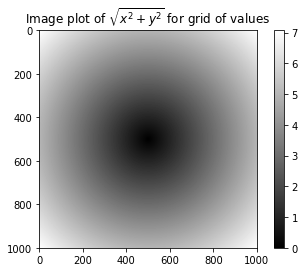

In [14]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for grid of values")
plt.show()

### Conditional logic as Array operation

In [190]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5, 1.6])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5, 2.7])
cond = (names == 'Joe')
cond

array([False,  True, False,  True,  True, False])

In [191]:
result = [x if c else y for x, y, c in zip(xarr, yarr, cond)]

In [192]:
result

[2.1, 1.2, 2.3, 1.4, 1.5, 2.7]

* Above syntax will not efficient on large array. Second, it will not work with multidimensional array.

### `where`
* Produce new array of values based on another array.

In [193]:
result = np.where(cond, xarr, yarr)

In [194]:
result

array([2.1, 1.2, 2.3, 1.4, 1.5, 2.7])

In [195]:
arr17 = np.random.randn(4,4)

In [196]:
arr17

array([[-0.65103973, -0.1140689 ,  0.83182748, -1.35758853],
       [-0.24635818,  0.00382524,  0.14171027,  1.31725661],
       [ 0.07249006,  0.1801675 , -1.42949868, -0.74457895],
       [ 2.58267924, -1.33523704,  0.24280328,  1.13009499]])

In [197]:
np.where(arr17 > 0, 2, -2) # replace negative value with -2 and positive with 2

array([[-2, -2,  2, -2],
       [-2,  2,  2,  2],
       [ 2,  2, -2, -2],
       [ 2, -2,  2,  2]])

In [198]:
np.where(arr17 > 0, 2, arr17) # only replace +ve value with 2

array([[-0.65103973, -0.1140689 ,  2.        , -1.35758853],
       [-0.24635818,  2.        ,  2.        ,  2.        ],
       [ 2.        ,  2.        , -1.42949868, -0.74457895],
       [ 2.        , -1.33523704,  2.        ,  2.        ]])

### Statistical methods

In [199]:
arr18 = np.random.randn(5,4)

In [200]:
arr18

array([[ 0.41062536, -0.36529391, -0.42352652,  2.10708699],
       [ 0.62868593, -0.02137792,  0.78236108, -0.10279797],
       [ 0.42234254,  1.64974338,  0.40420576, -0.30319278],
       [-0.58999441, -0.31028071, -0.17178855,  0.6828687 ],
       [-0.65785454, -0.44541451, -0.8254715 , -0.46029239]])

In [201]:
arr18.min()

-0.8254714961310613

* We can supply optional axis argument to compute statistics over that axis.

In [202]:
arr18.min(axis=0) # axis specify dimension that will be collapsed NOT one which return

array([-0.65785454, -0.44541451, -0.8254715 , -0.46029239])

In [203]:
arr18.max()

2.10708699382052

In [204]:
arr18.max(axis=1)

array([ 2.10708699,  0.78236108,  1.64974338,  0.6828687 , -0.44541451])

In [205]:
arr18.mean()

0.12053170327777929

In [206]:
np.mean(arr18)

0.12053170327777929

In [207]:
arr18.sum()

2.410634065555586

In [208]:
arr18.mean(axis = 1) # compute mean accross the column

array([ 0.43222298,  0.32171778,  0.54327473, -0.09729874, -0.59725823])

In [209]:
arr18.sum(axis = 0) # compute sum down the rows

array([ 0.21380489,  0.50737633, -0.23421971,  1.92367256])

### `cumsum`, `cumprod`

In [210]:
arr19 = np.arange(8)

In [211]:
arr19

array([0, 1, 2, 3, 4, 5, 6, 7])

In [212]:
arr19.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28], dtype=int32)

In [213]:
arr20 = np.array([[0,1,2],[3,4,5],[6,7,8]])

In [214]:
arr20

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [215]:
arr20.cumsum(axis = 0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]], dtype=int32)

In [216]:
arr20.cumprod(axis = 1)

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]], dtype=int32)

![stat function list](images/stat_method.JPG)


### Methods for boolean array

In [217]:
arr21 = np.random.randn(100)

In [218]:
(arr21 > 0).sum() # number of positive value

45

In [219]:
arr22 = np.array([False, True, False, False, True])

In [220]:
arr22.all() # Does all value is True

False

In [221]:
arr22.any() # Does any value is True

True

### Sorting
* in-place

In [222]:
arr23 = np.random.randn(6)

In [223]:
arr23.sort()

In [224]:
arr23

array([-1.1913479 , -1.03039738, -0.1503746 , -0.02265278,  0.40012784,
        0.96405947])

In [225]:
arr24 = np.random.randn(5,3)

In [226]:
arr24

array([[ 0.51894653, -1.96539176,  0.18027438],
       [-0.04913407,  1.15005458, -0.02301944],
       [ 0.15010369,  0.34455125,  0.41564804],
       [ 0.70272488,  0.23191084,  0.02888461],
       [ 0.05820644, -0.27825631, -0.1662171 ]])

In [227]:
arr24.sort(1)

In [228]:
arr24

array([[-1.96539176,  0.18027438,  0.51894653],
       [-0.04913407, -0.02301944,  1.15005458],
       [ 0.15010369,  0.34455125,  0.41564804],
       [ 0.02888461,  0.23191084,  0.70272488],
       [-0.27825631, -0.1662171 ,  0.05820644]])

* `np.sort(arr)` return copy of sorted array 
* There is no option for descending order. We can use `[::-1]` whenever needed.

### Indirect sort
* Given key(s) we need array of int indices that tells how to reorder the data to be in sorted order.

### `numpy.argsort()`
* Return indices which would sort an array

In [229]:
arr38 = np.array(['orange', 'banana', 'apple', 'grape', 'cherry'])

In [230]:
sort_idx = np.argsort(arr38)

In [231]:
arr38[sort_idx]

array(['apple', 'banana', 'cherry', 'grape', 'orange'], dtype='<U6')

* In the same way for 2D array, choose column as sort column and apply `argsort` on ot. Retrieve rows in sequence of return value of `argsort`.

In [232]:
arr61 = np.random.randn(3,5)

In [233]:
arr61

array([[ 1.1807318 , -1.25705164, -1.087304  , -0.65758699, -1.68471112],
       [ 0.63386356, -1.97984372,  0.06888759,  1.55760798,  1.11472543],
       [ 0.02177168, -0.28082593, -0.48684481,  1.03886159, -1.27837811]])

In [234]:
arr61[:, arr61[0].argsort()]

array([[-1.68471112, -1.25705164, -1.087304  , -0.65758699,  1.1807318 ],
       [ 1.11472543, -1.97984372,  0.06888759,  1.55760798,  0.63386356],
       [-1.27837811, -0.28082593, -0.48684481,  1.03886159,  0.02177168]])

### `lexsort()`
* Indirect lexicographical sort on multiple key arrays
* Sort data by first and last name

In [235]:
first = np.array(['Bob','Jane','Steve','Bill','Barbara'])
last = np.array(['Jones', 'Arnold', 'Arnold', 'Jones', 'Walters'])

In [236]:
sorter = np.lexsort((first,last))

In [237]:
sorter

array([1, 2, 3, 0, 4], dtype=int64)

In [238]:
list(zip(last[sorter], first[sorter]))

[('Arnold', 'Jane'),
 ('Arnold', 'Steve'),
 ('Jones', 'Bill'),
 ('Jones', 'Bob'),
 ('Walters', 'Barbara')]

#### Stable sort
* Preserves relative position of equal elements

In [239]:
arr62 = np.array(['2:first', '2:second', '1:first', '1:second', '1:third'])

In [40]:
key = np.array([2,2,1,1,1])

In [41]:
indexer = key.argsort(kind='mergesort')

In [42]:
indexer

array([2, 3, 4, 0, 1], dtype=int64)

In [243]:
arr62[indexer]

array(['1:first', '1:second', '1:third', '2:first', '2:second'],
      dtype='<U8')

### `partition` `argpartition`
* Partition array around kth smallest element

In [244]:
arr63 = np.random.randn(20)

In [245]:
np.partition(arr63, 3)

array([-3.37383890e+00, -1.53828292e+00, -1.50384548e+00, -1.45414127e+00,
        1.84120118e+00,  4.03443838e-01,  2.54846012e-01,  2.50764874e-03,
        7.28988587e-02, -5.53454111e-01,  6.13746320e-01, -8.73983052e-01,
        7.97405908e-01,  1.31170649e+00, -6.17618097e-02,  7.25051090e-01,
        7.48176376e-02,  1.62221961e-01,  1.76751462e+00, -8.44296492e-01])

* First 3 values are smallest 3 values in no particular order.
* `argpartition` will return index array

In [246]:
i = np.argpartition(arr63, 3)

In [247]:
arr63[i]

array([-3.37383890e+00, -1.53828292e+00, -1.50384548e+00, -1.45414127e+00,
        1.84120118e+00,  4.03443838e-01,  2.54846012e-01,  2.50764874e-03,
        7.28988587e-02, -5.53454111e-01,  6.13746320e-01, -8.73983052e-01,
        7.97405908e-01,  1.31170649e+00, -6.17618097e-02,  7.25051090e-01,
        7.48176376e-02,  1.62221961e-01,  1.76751462e+00, -8.44296492e-01])

### `searchsorted`
* Perform binary search on sorted array. Returning location in the array where the value need to be inserted to maintain sortedness.

In [248]:
arr64 = np.array([0,1,7,12,15])

In [249]:
arr64.searchsorted(9)

3

In [250]:
arr64.searchsorted([0,8,11,16])

array([0, 3, 3, 5], dtype=int64)

In [251]:
arr65 = np.array([0,0,0,1,1,1,1])

In [252]:
arr65.searchsorted([0,1])

array([0, 3], dtype=int64)

In [253]:
arr65.searchsorted([0,1], side='right')

array([3, 7], dtype=int64)

#### `unique`
* Returns sorted unique value of array

In [254]:
names

array(['Bob', 'Joe', 'Will', 'Joe', 'Joe', 'Bob'], dtype='<U4')

In [255]:
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [256]:
sorted(set(names))

['Bob', 'Joe', 'Will']

### `np.in1d`
* Test membership of values in one array in another, returning boolean array.

In [257]:
values = np.array([6,0,0,3,2,5,6])
np.in1d(values, [2,3,6])

array([ True, False, False,  True,  True, False,  True])

### `np.intersect1d(x, y)`

In [258]:
x = np.array(['desk', 'chair', 'bulb'])
y = np.array(['lamp', 'chair', 'bulb'])
np.intersect1d(x, y)

array(['bulb', 'chair'], dtype='<U5')

### `np.union1d(x, y)`

In [259]:
np.union1d(x, y)

array(['bulb', 'chair', 'desk', 'lamp'], dtype='<U5')

### `np.setdiff1d(x, y)`

In [260]:
np.setdiff1d(x,y)

array(['desk'], dtype='<U5')

![set function list](images/set.JPG)


### `np.save`, `np.load`
* Save and load array data on disk. Array are saved by default in uncompressed raw binary format with file extension `.npy`

In [261]:
arr25 = np.arange(10)

In [262]:
arr25

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [263]:
np.save('some_array', arr25)

In [264]:
np.load('some_array.npy')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* To store multiple arrays in an uncompressed archive using `np.savez` and passing array as keyword argument.

In [265]:
np.savez('array_archive.npz', a = arr25, b = arr24)

* By loading archive, we get back dict-like object that load individual array easily.

In [266]:
arch = np.load('array_archive.npz')

In [267]:
arch['a']

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [268]:
arch['b']

array([[-1.96539176,  0.18027438,  0.51894653],
       [-0.04913407, -0.02301944,  1.15005458],
       [ 0.15010369,  0.34455125,  0.41564804],
       [ 0.02888461,  0.23191084,  0.70272488],
       [-0.27825631, -0.1662171 ,  0.05820644]])

* If data should be compressed, use `np.savez_compressed`

In [ ]:
np.savez_compressed('array_compressed.npz', a = arr25, b = arr24)

### Linear Algebra

In [269]:
arr26 = np.random.randn(3,5)
arr27 = np.random.randn(5,3)

In [270]:
arr26.dot(arr27) # Matrix multiplication

array([[-1.97459143,  3.53840641, -3.19781634],
       [-0.0265073 , -0.58342439, -0.19277651],
       [-2.00879345,  0.61735125, -0.28624133]])

In [271]:
arr26 @ arr27 # Also performs matrix multiplication

array([[-1.97459143,  3.53840641, -3.19781634],
       [-0.0265073 , -0.58342439, -0.19277651],
       [-2.00879345,  0.61735125, -0.28624133]])

### `numpy.linalg`
* Contains standard matrix operation.



In [16]:
from numpy.linalg import inv, qr

In [17]:
arr28 = np.random.randn(5,5)

In [18]:
arr29 = arr28.T.dot(arr28)

In [19]:
inv(arr29)

array([[ 1.31330705,  0.33619522,  0.61093976,  0.66336664, -0.33705488],
       [ 0.33619522,  0.40845591,  0.03924948,  0.16314002, -0.1413717 ],
       [ 0.61093976,  0.03924948,  0.64794595,  0.59444433, -0.07748254],
       [ 0.66336664,  0.16314002,  0.59444433,  0.86561832, -0.06719782],
       [-0.33705488, -0.1413717 , -0.07748254, -0.06719782,  0.18744524]])

In [21]:
arr29.dot(inv(arr29))

array([[ 1.00000000e+00,  1.22930246e-17,  4.03881399e-16,
         1.64538808e-16,  7.95898946e-17],
       [-1.51052312e-16,  1.00000000e+00, -5.52683566e-17,
        -1.15373078e-17, -5.29273176e-17],
       [-5.12211566e-16, -1.46212660e-16,  1.00000000e+00,
         7.28764686e-16, -5.26007043e-18],
       [-4.81068473e-17, -5.40619120e-17, -7.65418278e-18,
         1.00000000e+00, -2.41739050e-17],
       [ 1.86863325e-16,  5.87920901e-17,  1.00580464e-16,
        -5.06003257e-16,  1.00000000e+00]])

q, r = qr(arr29) # qr decomposition. r part is upper triangular matrix

In [23]:
r

array([[ -5.95773949,  -0.32899802,   2.90715872,   1.77903553,
        -13.10087312],
       [  0.        ,  -5.36514401,  -4.87418947,   4.15741803,
         -6.4987637 ],
       [  0.        ,   0.        ,  -4.42674563,   3.57373936,
         -0.56074003],
       [  0.        ,   0.        ,   0.        ,  -1.09318332,
         -2.21675954],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          2.36196981]])

![matrix function list](images/matrix.jpg)


### Random number generation

#### Standard normal distribution `random.normal`

In [276]:
arr30 = np.random.normal(size = (4,4))

In [277]:
arr30

array([[ 0.83816517, -0.27088742,  1.39380665, -2.40812294],
       [-1.05921981,  0.48694033, -0.6924501 ,  0.38593582],
       [-0.33176447, -0.58232858,  0.53015659,  0.21599647],
       [-0.90331048,  0.13892713, -0.29722718,  0.78873041]])

In [278]:
height = np.random.normal(1.75,0.20,5000) # distribution mean, SD, numbers of samples

* Python's built-in `random` module, only samples one value at a time

* To change seed of numpy's random number generator.

In [279]:
np.random.seed(1234)

In [280]:
np.random.rand() # Creates number between 0 and 1

0.1915194503788923

* It is called psuedo-random number. It is generated from mathematical formula starting from seed.

In [281]:
np.random.seed(123)

In [282]:
np.random.rand()

0.6964691855978616

In [283]:
np.random.rand()

0.28613933495037946

In [284]:
np.random.seed(123)

In [285]:
np.random.rand()

0.6964691855978616

In [286]:
np.random.rand()

0.28613933495037946

* We got same numbers if we start from same seed.
* Same seed => same random numbers.
* Ensures reproducibility.

In [287]:
np.random.randint(0,2) # randomly generate integers 0 or 1. 2 is not included

0

In [288]:
np.random.randint(0,10, (3,3)) # randomly generate integers between 0 and 9. 

array([[2, 6, 1],
       [3, 9, 6],
       [1, 0, 1]])

In [289]:
np.random.random((3,3)) # Uniformly distributed random values between 0 and 1

array([[0.4809319 , 0.39211752, 0.34317802],
       [0.72904971, 0.43857224, 0.0596779 ],
       [0.39804426, 0.73799541, 0.18249173]])

![random function list](images/random.JPG)

### How ndarray can show view of data without copying anything?
- It has striding information that enables the array to move through varying steps.
- ndarray internally has following
    - pointer to data
    - dtype
    - tuple indicating shape
    - A tuple of strides, integers indicating number of bytes to step in order to advance one element along a dimension

In [290]:
np.ones((3,4,5), dtype = np.float64).strides

(160, 40, 8)

### `np.integer` `np.floating`
* Superclass to other numpy types.

In [291]:
ints = np.ones(10, dtype = np.uint16)

In [292]:
floats = np.ones(10, dtype = np.float32)

In [293]:
np.issubdtype(ints.dtype, np.integer)

True

In [294]:
np.issubdtype(floats.dtype, np.floating)

True

### `mro`
* To check all parent type of specific dtype

In [295]:
np.float64.mro()

[numpy.float64,
 numpy.floating,
 numpy.inexact,
 numpy.number,
 numpy.generic,
 float,
 object]

### Reshaping arrays `reshape`

In [296]:
ints = np.arange(10)

In [297]:
ints.reshape((5,2))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [298]:
ints.reshape((5,2), order = 'C') # Row major, default

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [299]:
ints.reshape((5,2), order = 'F') # Column major

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

In [300]:
ints.reshape((5,-1)) # One of the dimension can be -1 that will be inferred from data.

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

### flattening and raveling

In [301]:
arr31 = np.arange(15).reshape((5,3))

In [302]:
arr31

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [303]:
arr31.ravel() # Does not produce copy if underlying values are contiguous in the original array

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [304]:
arr31.flatten() # Always return copy

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

### Concatenating and splitting arrays
* `np.concatenate` takes a sequence of arrays and joins them together in order along the input axes.

In [305]:
arr32 = np.array([[1,2,3], [4,5,6]])
arr33 = np.array([[7,8,9],[10,11,12]])

In [306]:
np.concatenate([arr32, arr33], axis = 0)

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [307]:
np.concatenate([arr32, arr33], axis = 1)

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [308]:
arr35 = np.array([[1,1,1],[1,1,1]])
arr35

array([[1, 1, 1],
       [1, 1, 1]])

In [309]:
arr36 = np.array([0,0,0])
arr36

array([0, 0, 0])

In [310]:
np.concatenate([arr35,arr36], axis = 0)

ValueError: all the input arrays must have same number of dimensions

In [311]:
arr35.shape

(2, 3)

In [312]:
arr36.shape

(3,)

* We need shape of `arr36` to be (1,3)
### `np.expand_dims()`
* Insert new axis that will appear at the axis position in the expanded array shape.

In [313]:
arr37 = np.expand_dims(arr36, axis = 0)
arr37

array([[0, 0, 0]])

In [314]:
np.concatenate([arr35, arr37], axis = 0)

array([[1, 1, 1],
       [1, 1, 1],
       [0, 0, 0]])

In [315]:
np.hstack((arr32, arr33))

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])

In [316]:
np.vstack((arr32, arr33))

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

* `nd.dstack` will stack arrays along with 3rd axis.

In [317]:
arr40 = [1,2,3,99,99,3,2,1]
x1, x2, x3 = np.split(arr40, [3,5])

In [318]:
x1

array([1, 2, 3])

In [319]:
x2

array([99, 99])

In [320]:
x3

array([3, 2, 1])

*  N split point lead to N + 1 subarrays.

In [321]:
arr41 = np.arange(16).reshape((4,4))

In [322]:
arr41

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [323]:
upper, lower = np.vsplit(arr41, [2])

In [324]:
upper

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [325]:
lower

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [326]:
left, right = np.hsplit(arr41, [2])

In [327]:
left

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

In [328]:
right

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15]])

* `np.dsplit` will split array along the third axis.

![concatenation](images/concatenation.JPG)

* `r_` and `c_` make stacking array more easier and concise.

In [329]:
arr47 = np.random.randn(3,2)

In [330]:
arr47

array([[ 0.12652592, -1.30148897],
       [ 2.20742744,  0.52274247],
       [ 0.46564476,  0.72491523]])

In [331]:
arr48 = np.arange(6).reshape(3,2)

In [332]:
arr48

array([[0, 1],
       [2, 3],
       [4, 5]])

In [333]:
np.r_[arr48,arr47]

array([[ 0.        ,  1.        ],
       [ 2.        ,  3.        ],
       [ 4.        ,  5.        ],
       [ 0.12652592, -1.30148897],
       [ 2.20742744,  0.52274247],
       [ 0.46564476,  0.72491523]])

In [334]:
np.c_[arr48,arr47]

array([[ 0.        ,  1.        ,  0.12652592, -1.30148897],
       [ 2.        ,  3.        ,  2.20742744,  0.52274247],
       [ 4.        ,  5.        ,  0.46564476,  0.72491523]])

### `np.nditer`

In [335]:
arr34 = np.array([[10,20,30,40,50], [60,70,80,90,100]])

In [336]:
for item in arr34:
    print(item)

[10 20 30 40 50]
[ 60  70  80  90 100]


In [337]:
for item in np.nditer(arr34):
    print(item)

10
20
30
40
50
60
70
80
90
100


### `np.genfromtxt(filename, delimiter, skip_header)`:
* Reads text file into numpy array.
* skip_header accepts an integer, the number of rows from the start of the file to skip.
* `arr = np.genfromtxt('xyz.csv', delimiter = ',')`

### `np.loadtxt`
* `np.loadtxt("filename.csv". delimeter = ',', skiprows = 1,  usecol = [0,2], dtype = str)`
* Specify type to convert to when data has different types otherwise it will freak out.

### tile and repeat
* `repeat` replicate each element in array some number of times

In [338]:
arr49 = np.arange(3)

In [339]:
arr49

array([0, 1, 2])

In [340]:
arr49.repeat(3)

array([0, 0, 0, 1, 1, 1, 2, 2, 2])

In [341]:
arr49.repeat([2,3,4])

array([0, 0, 1, 1, 1, 2, 2, 2, 2])

In [342]:
arr50 = np.random.randn(2,2)

In [343]:
arr50

array([[ 1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 ]])

In [344]:
arr50.repeat(2, axis = 0)

array([[ 1.49582653,  0.74658059],
       [ 1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 ],
       [-1.10098526, -1.4103012 ]])

In [345]:
arr50.repeat([2,3], axis=1)

array([[ 1.49582653,  1.49582653,  0.74658059,  0.74658059,  0.74658059],
       [-1.10098526, -1.10098526, -1.4103012 , -1.4103012 , -1.4103012 ]])

* `tile` stack copies of array along an axis. Visualize as "laying down tiles"

In [346]:
np.tile(arr50,2)

array([[ 1.49582653,  0.74658059,  1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 , -1.10098526, -1.4103012 ]])

In [347]:
np.tile(arr50,(2,1)) # 2 tile at axis 0 , 1 tile axis 1

array([[ 1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 ],
       [ 1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 ]])

In [348]:
np.tile(arr50,(3,2))

array([[ 1.49582653,  0.74658059,  1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 , -1.10098526, -1.4103012 ],
       [ 1.49582653,  0.74658059,  1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 , -1.10098526, -1.4103012 ],
       [ 1.49582653,  0.74658059,  1.49582653,  0.74658059],
       [-1.10098526, -1.4103012 , -1.10098526, -1.4103012 ]])

### `take` `put`

In [349]:
arr51 = np.arange(10) * 100

In [350]:
arr51

array([  0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

In [351]:
inds = [7,1,2,6]

In [352]:
arr51[inds]

array([700, 100, 200, 600])

In [353]:
arr51.take(inds)

array([700, 100, 200, 600])

In [354]:
arr51.put(inds, 42)

In [355]:
arr51

array([  0,  42,  42, 300, 400, 500,  42,  42, 800, 900])

In [356]:
arr51.put(inds, [40,41,42,43])

In [357]:
arr51

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [358]:
inds = [2,0,2,1]

In [359]:
arr52 = np.random.randn(2,4)

In [360]:
arr52

array([[-0.74765132, -0.98486761, -0.74856868,  0.24036728],
       [-1.85563747, -1.7794548 , -2.75022426, -0.23415755]])

In [361]:
arr52.take(inds)

array([-0.74856868, -0.74765132, -0.74856868, -0.98486761])

In [362]:
arr52.take(inds, axis = 1)

array([[-0.74856868, -0.74765132, -0.74856868, -0.98486761],
       [-2.75022426, -1.85563747, -2.75022426, -1.7794548 ]])

### Broadcasting
* Describe arithmetic between arrays of different shapes

In [363]:
arr51

array([  0,  41,  42, 300, 400, 500,  43,  40, 800, 900])

In [364]:
arr51 * 2 # 2 broadcasted to all of the other elements in the multiplication operation

array([   0,   82,   84,  600,  800, 1000,   86,   80, 1600, 1800])

##### Centering array of data

In [365]:
arr53 = np.random.randn(4,3)

In [366]:
arr53.mean(axis=0)

array([-0.32051943, -0.58674131,  0.46525943])

In [367]:
demeaned = arr53 - arr53.mean(axis=0)

In [368]:
demeaned

array([[-0.37546175, -1.18739275,  1.89634183],
       [ 0.35551251,  0.24209962, -1.19029173],
       [ 1.3601256 ,  0.34501327, -0.57816479],
       [-1.34017636,  0.60027986, -0.12788531]])

In [369]:
demeaned.mean(axis=0)

array([ 0.00000000e+00, -2.77555756e-17, -2.77555756e-17])

In [44]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

In [45]:
a

array([0, 1, 2])

In [46]:
a.shape

(3,)

In [372]:
b

array([[0],
       [1],
       [2]])

In [373]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

* Two arrays are compatible for broadcasting if for each trailing dimension axis length match or either of the length is 1.
* Broadcasting performed on missing axis or length 1 dimension.

#### Broadcasting over other axis

In [374]:
arr53 - arr53.mean(axis=1)

ValueError: operands could not be broadcast together with shapes (4,3) (4,) 

* why?? (4,) Broadcast dimension must be 1 in the smaller array. So we need to convert (4,) to (4,1)

In [375]:
arr53 - arr53.mean(axis=1).reshape((4,1))

array([[-6.59809851e-01, -1.73796273e+00,  2.39777259e+00],
       [ 3.79886717e-01,  2.51942631e-04, -3.80138659e-01],
       [ 8.11281913e-01, -4.70052300e-01, -3.41229613e-01],
       [-1.22410141e+00,  4.50132920e-01,  7.73968493e-01]])

* another alternative to add dimension is

In [376]:
arr54 = np.zeros((4,4))

In [377]:
arr55 = arr54[:,np.newaxis,:]

In [378]:
arr55

array([[[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]],

       [[0., 0., 0., 0.]]])

In [379]:
arr55.shape

(4, 1, 4)

In [380]:
arr55 = arr54[:,:,np.newaxis]

In [381]:
arr55

array([[[0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.],
        [0.]]])

In [382]:
arr55 = arr54[np.newaxis,:,:]

In [383]:
arr55

array([[[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]]])

### Structured array
* Each element can be think as struct in C or row in SQL table with multiple field name.

In [384]:
# Define structured type
t = [('x', np.float64), ('y', np.int32)] # (fieldname, field_data_type)

In [385]:
arr58 = np.array([(1.5, 6), (7.5, 9), (5.66, 4)], dtype=t)

In [386]:
arr58

array([(1.5 , 6), (7.5 , 9), (5.66, 4)],
      dtype=[('x', '<f8'), ('y', '<i4')])

In [387]:
arr58[0]

(1.5, 6)

In [388]:
arr58[0]['x']

1.5

In [389]:
arr58['x']

array([1.5 , 7.5 , 5.66])

In [390]:
data = np.zeros(4, dtype = {'names': ('name', 'age', 'weight'), 'formats':('U10', 'i4', 'f8')})

In [391]:
data

array([('', 0, 0.), ('', 0, 0.), ('', 0, 0.), ('', 0, 0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [392]:
data['name'] = ['Purvil', 'Japan', 'Bhavika', 'Bhavna']

In [393]:
data['age'] = [26,30,26,63]
data['weight'] = [100,80,58,74]

In [394]:
data

array([('Purvil', 26, 100.), ('Japan', 30,  80.), ('Bhavika', 26,  58.),
       ('Bhavna', 63,  74.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [395]:
data['name']

array(['Purvil', 'Japan', 'Bhavika', 'Bhavna'], dtype='<U10')

In [396]:
data[0]['name']

'Purvil'

In [397]:
data[0]

('Purvil', 26, 100.)

In [398]:
data[data['age'] < 30]

array([('Purvil', 26, 100.), ('Bhavika', 26,  58.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

#### multidimensional fields

In [399]:
t1 = [('x', np.float64, 3), ('y', np.int32)]

In [400]:
arr59 = np.zeros(4, dtype=t1)

In [401]:
arr59

array([([0., 0., 0.], 0), ([0., 0., 0.], 0), ([0., 0., 0.], 0),
       ([0., 0., 0.], 0)], dtype=[('x', '<f8', (3,)), ('y', '<i4')])

In [402]:
arr59[0]['x']

array([0., 0., 0.])

In [403]:
arr59['x']

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Nested structure

In [404]:
t2 = [('x', [('a', 'f8'), ('b', 'f4')]), ('y', np.int32)]

In [405]:
arr60 = np.array([((1,2),5), ((3,4),6)], dtype=t2)

In [406]:
arr60['x']

array([(1., 2.), (3., 4.)], dtype=[('a', '<f8'), ('b', '<f4')])

In [407]:
arr60['x']['a']

array([1., 3.])

In [408]:
arr60[0]['x']['a']

1.0

### `count_nonzero`

In [409]:
arr66 = np.random.randint(10, size = (3,4))

In [410]:
arr66

array([[4, 8, 1, 2],
       [1, 1, 3, 5],
       [9, 0, 8, 1]])

In [411]:
np.count_nonzero(arr66 < 6)

9

In [412]:
arr67 = np.array([1, np.nan, 3, 4])

In [413]:
arr67.sum()

nan

In [414]:
np.sum(arr67)

nan

In [415]:
np.nansum(arr67)

8.0

In [416]:
arr68 = np.zeros(10)

In [417]:
arr68[[2,3,3,4,4,4]] += 1

In [418]:
arr68

array([0., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [419]:
np.add.at(arr68, [2,3,3,4,4,4], 1)

In [420]:
arr68

array([0., 0., 2., 3., 4., 0., 0., 0., 0., 0.])

* `at()` method does inplace application of the given operator at the specified indices with specified value (1).

##### Example : Binning data

In [421]:
x = np.random.randn(100)

In [422]:
bins = np.linspace(-5,5,20)

In [423]:
counts = np.zeros_like(bins)

In [424]:
i = np.searchsorted(bins, x)

In [425]:
np.add.at(counts, i,1)

In [426]:
counts

array([ 0.,  0.,  0.,  1.,  0.,  3.,  3., 11.,  7., 23., 21., 19.,  6.,
        1.,  4.,  1.,  0.,  0.,  0.,  0.])

* Same above can be done using

In [427]:
np.histogram(x, bins)

(array([ 0,  0,  1,  0,  3,  3, 11,  7, 23, 21, 19,  6,  1,  4,  1,  0,  0,
         0,  0], dtype=int64),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]))

#### Example K nearest neighbor

In [428]:
x = np.random.randn(10,2)

In [429]:
x

array([[-2.32433632, -0.07658366],
       [-0.4981647 ,  2.0763131 ],
       [-1.92853502,  1.64785998],
       [-1.00448234, -0.90135582],
       [ 0.893222  ,  0.51187765],
       [-0.8690435 ,  2.39840183],
       [-1.00139033,  1.60247324],
       [ 1.498786  ,  0.52521122],
       [ 0.83108041,  0.02236774],
       [-0.06900945, -1.93337331]])

In [430]:
x[:, np.newaxis,:]

array([[[-2.32433632, -0.07658366]],

       [[-0.4981647 ,  2.0763131 ]],

       [[-1.92853502,  1.64785998]],

       [[-1.00448234, -0.90135582]],

       [[ 0.893222  ,  0.51187765]],

       [[-0.8690435 ,  2.39840183]],

       [[-1.00139033,  1.60247324]],

       [[ 1.498786  ,  0.52521122]],

       [[ 0.83108041,  0.02236774]],

       [[-0.06900945, -1.93337331]]])

In [431]:
 x[np.newaxis, :, :]

array([[[-2.32433632, -0.07658366],
        [-0.4981647 ,  2.0763131 ],
        [-1.92853502,  1.64785998],
        [-1.00448234, -0.90135582],
        [ 0.893222  ,  0.51187765],
        [-0.8690435 ,  2.39840183],
        [-1.00139033,  1.60247324],
        [ 1.498786  ,  0.52521122],
        [ 0.83108041,  0.02236774],
        [-0.06900945, -1.93337331]]])

In [432]:
difference = x[:, np.newaxis,:] -  x[np.newaxis, :, :]

In [433]:
sq_difference = difference ** 2

In [434]:
dist_sq = sq_difference.sum(-1)

In [435]:
dist_sq

array([[ 0.        ,  7.96986721,  3.13036455,  2.42226363, 10.69896826,
         8.24343033,  4.56941814, 14.97842132,  9.9664461 ,  8.53416708],
       [ 7.96986721,  0.        ,  2.22953131,  9.12286974,  4.38341524,
         0.24129223,  0.47776025,  6.39372915,  5.98558411, 16.26175936],
       [ 3.13036455,  2.22953131,  0.        ,  7.35237456,  9.25276854,
         1.68583533,  0.86165723, 13.0068696 , 10.25770234, 16.28306725],
       [ 2.42226363,  9.12286974,  7.35237456,  0.        ,  5.59851063,
        10.90674421,  6.2691695 ,  8.30144591,  4.22255583,  1.94016963],
       [10.69896826,  4.38341524,  9.25276854,  5.59851063,  0.        ,
         6.66455319,  4.77895462,  0.36688554,  0.24348153,  6.90514166],
       [ 8.24343033,  0.24129223,  1.68583533, 10.90674421,  6.66455319,
         0.        ,  0.65101801,  9.11545961,  8.53595931, 19.40433036],
       [ 4.56941814,  0.47776025,  0.86165723,  6.2691695 ,  4.77895462,
         0.65101801,  0.        ,  7.41137513

In [436]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [437]:
nearest = np.argsort(dist_sq, axis=1)

In [438]:
nearest

array([[0, 3, 2, 6, 1, 5, 9, 8, 4, 7],
       [1, 5, 6, 2, 4, 8, 7, 0, 3, 9],
       [2, 6, 5, 1, 0, 3, 4, 8, 7, 9],
       [3, 9, 0, 8, 4, 6, 2, 7, 1, 5],
       [4, 8, 7, 1, 6, 3, 5, 9, 2, 0],
       [5, 1, 6, 2, 4, 0, 8, 7, 3, 9],
       [6, 1, 5, 2, 0, 4, 8, 3, 7, 9],
       [7, 4, 8, 1, 6, 3, 9, 5, 2, 0],
       [8, 4, 7, 3, 9, 6, 1, 5, 0, 2],
       [9, 3, 8, 4, 7, 0, 6, 1, 2, 5]], dtype=int64)

### RecordArrays
* Field can be accessed attributes rather than just keys.
* `np.recarray`
* Convert simple structured array to record array using,
    - data_rec = data.view(np.recarray)
* It is bit slower than structured array though.

### `resize`
* Chnage dimension in place

In [48]:
my_num = np.arange(16)

In [49]:
my_num.resize((4,4))

In [50]:
my_num

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

 ### `append`